In this homework, you will write a python implementation of logistic regression. You will test it on two datasets. 
First we import some libraries that we need. 

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

We define some functions involved. Use the formulations that avoid overflows.  
1. sigmoid function sigmoid(t)
2. log of sigmoid(t), called log_sig(t)
3. log of 1-sigmoid = 1/(1+e^t), called log_one_sig(t)
4. cross-entropy loss function given the inputs of label y and prediction y_hat = sigmoid(z), where y, y_hat, and z are vectors of dimension N. (N = # of data points.) You should implement this function with z, rather than y_hat, as the input; namely, the loss function should be

    loss = -y log(sigmoid(z)) - (1-y) log (1-sigmoid(z)) 

  where log(sigmoid(z)) and log (1-sigmoid(z)) should be computed by the functions log_sig(z) and log_one_sig(z) in parts 2 and 3.

In [7]:
def sigmoid(t):
      return 1/(1+np.exp(-t))

def custom_loss(y, z):
    return ((-y*log_sig(z)) - ((1-y)*log_one_sig(z)))

def log_sig(t):
      return np.log(sigmoid(t))

def log_one_sig(t):
      return np.log(1-sigmoid(t))


Define the model output z=w^T x + b, or z = x^Tw + B, given the data input X (an N-by-n array containing N data points) and the model parameters w (n-dimensional weigth vector) and b (bias).

Note that mathematically it's easier to write the data matrix as an n-by-N matrix, with each column being a data point. In python, the data is more commonly represented as as an N-by-n array. 

In [92]:
def model(w,b,X):
  # using X as Nxn
  print(f'In model, X: {X.shape}, b: {b}, w: {w.shape}')
  return (X @ w)+b


Define the function that computes the gradient of the cross-entropy loss given the label y (N-vector), the model prediction y_hat = sigmoid(z) (N-vector), and the dataset X (an n-by-N or N-by-n array). It's probably easier to return the gradients with respect w and b separately, which can be used to update w and b later on. 

In [93]:
def gradients(X, y, y_hat):
  # Using X as Nxn
  print(f'grad: y shape: {y.shape}, X shape: {X.shape}')
  return (np.transpose(X) @ (y_hat - y))/X.shape[0]
    

Write the function that minimizes the loss (i.e. training) by the gradient descent algorithm using a fixed number of iteration (*iter*) and learning rate (*lr*). Your function should take *iter* and *lr* as well as the initial weight w, initial bias b, the input data X and the label y as the inputs. It produces new w and b as output. Also compute the loss value at each iteration and output the sequence of the loss.

In [168]:
def train(w, b, X, y, iter, lr):
  print(f'>> {X.shape}')
  losslist=list()
  print('>>',X.shape)
  for k in range(iter):
    z = model(w, b, X)
    y_hat = sigmoid(z)
    grad = gradients(X, y, y_hat)
    print(f'gradient shape: {grad.shape}')
    w = w - (lr * grad)
    print(f'y_hat: {y_hat.shape}, y: {y.shape}')
#     b = b - (lr * (y_hat - y)[0])
    b = np.mean((b*np.ones(y_hat.shape)) - (lr * (y_hat - y)))
    myloss = custom_loss(y, y_hat)
    losslist.append(np.mean(myloss))
    print(f'Iter: {k} Loss: {losslist[-1]}')
  w_hat = np.transpose(w_hat)[0]
  return w_hat[1:], w_hat[0], losslist
    


1. Write the function that uses a trained model to produce class prediction (0 or 1) for an input dataset X, i.e. turn the model output z = model(w,b,X) into predicted label y_label (N-vector of 0 or 1). 
2. For an input dataset X with a known label y (e.g. a training or testing dataset) and a predicted label y_label, compute the accuracy of prediction (i.e. # correct predictions/N)

In [169]:
def predict(z):
  ypred = sigmoid(z)
  ypred[ypred<=0.5]=0
  ypred[ypred>0.5]=1
  ypred = ypred.astype(int)
  ypred = np.squeeze(ypred)
  # print(f'In pred, {ypred.shape}')
  return ypred

def accuracy(y, y_label):
  diff_bool = (y == y_label)
  diff_true = diff_bool[diff_bool==True]
  total_sample = len(diff_bool)
  return (len(diff_true)/total_sample)
    

We are ready to test your programs on some datasets. First, we use a synthetic dataset generated using [scikit-learn](https://scikit-learn.org/stable/datasets.html) package. We generate a dataset for training and simultaneously a dataset for testing.

(500, 2)


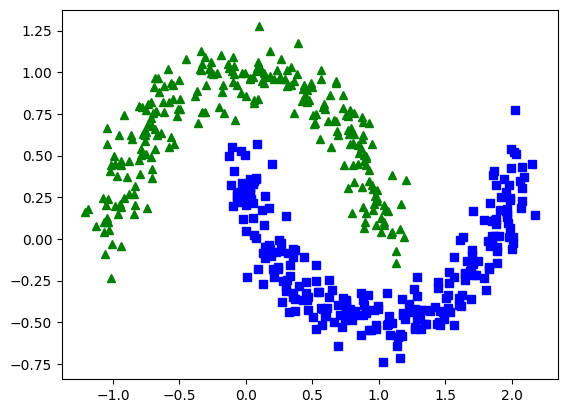

In [170]:
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=500, noise=0.1)
X_test, y_test = make_moons(n_samples=1000, noise=0.1)

print(X_train.shape)
plt.figure()
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "g^")
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")



Here is another toy test example you may try but not part of homework. 

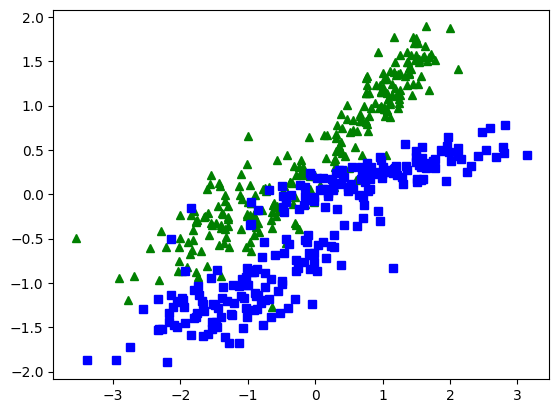

In [171]:
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=1000, n_features=4)
X_test=X_train[500:,]
y_test=y_train[500:,]
X_train=X_train[:500,]
y_train=y_train[:500,]

plt.figure()
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "g^")
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")

We now train the model using (X_train, y_train). We initialize weight as a random vector, and b=0. We plot the loss convergence history. You should get the loss down to about 0.2.
We compute the prediction accuracy on (X_train, y_train). You should get an accuracy in the 80s. 

In [172]:
w = np.random.rand(X_train.shape[1],1)  # assuming X is N-by-n. 
                                        # if X is n-by-N, use X_train.shape[0]
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(w.shape)
print(X_train.shape)
print(y_train.shape)
b = 0
w, b, loss = train(w, b, X_train, y_train, iter=300, lr=0.1)
plt.figure()
plt.plot(loss)

#training accuracy 
z = model(w,b,X_train)
print(accuracy(np.squeeze(y_train), predict(z)))

(4, 1)
(500, 4)
(500, 1)
>> (500, 4)
>> (500, 4)
In model, X: (500, 4), b: 0, w: (4, 1)
grad: y shape: (500, 1), X shape: (500, 4)
gradient shape: (4, 1)
y_hat: (500, 1), y: (500, 1)
Iter: 0 Loss: 0.7080857956362961
In model, X: (500, 4), b: 0.0009168099587221059, w: (4, 1)
grad: y shape: (500, 1), X shape: (500, 4)
gradient shape: (4, 1)
y_hat: (500, 1), y: (500, 1)
Iter: 1 Loss: 0.7014104799107681
In model, X: (500, 4), b: 0.001953640804545477, w: (4, 1)
grad: y shape: (500, 1), X shape: (500, 4)
gradient shape: (4, 1)
y_hat: (500, 1), y: (500, 1)
Iter: 2 Loss: 0.69498584255163
In model, X: (500, 4), b: 0.003108250672714767, w: (4, 1)
grad: y shape: (500, 1), X shape: (500, 4)
gradient shape: (4, 1)
y_hat: (500, 1), y: (500, 1)
Iter: 3 Loss: 0.6888472823644091
In model, X: (500, 4), b: 0.0043763300250973915, w: (4, 1)
grad: y shape: (500, 1), X shape: (500, 4)
gradient shape: (4, 1)
y_hat: (500, 1), y: (500, 1)
Iter: 4 Loss: 0.6830187551688212
In model, X: (500, 4), b: 0.005751794715

UnboundLocalError: local variable 'w_hat' referenced before assignment

In [141]:
X.shape

(41188, 35)

In [145]:
np.vstack((np.ones((1,X.shape[1])),X))

array([[  1.,   1.,   1., ...,   1.,   1.,   1.],
       [ 44., 210.,   1., ...,   0.,   1.,   0.],
       [ 53., 138.,   1., ...,   0.,   1.,   0.],
       ...,
       [ 42.,  62.,   3., ...,   0.,   1.,   0.],
       [ 48., 200.,   2., ...,   0.,   1.,   0.],
       [ 25., 112.,   4., ...,   0.,   1.,   0.]])

To see how well our model performs, we compute its accuracy on the testing dataset (X_test, y_test).

In [99]:
z = model(w,b,X_test)
y_test=np.squeeze(y_test)
print(accuracy(y_test, predict(z)))


In model, X: (500, 4), b: [-1.90193764], w: (4, 1)
0.85


Now, we look at a real-world dataset. [The Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#) is available at UCI's Machine Learning Repository. Colab can read this dataset directly from [GitHub](https://github.com/madmashup/targeted-marketing-predictive-engine) using pandas package: pd.read_csv. The data is in the DataFrame format.

In [100]:
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
data = pd.read_csv(url)
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


This dataset is pretty large and cause my machine to crash. I remove some fileds. [This Webpage](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) has a good description of this dataset. Note that you are not allowed to use any existing model such as those used in that Webpage for this homework.

In [101]:
cat_vars=['default','education','contact','month','day_of_week',]
data=data.drop(cat_vars, axis=1)
print(list(data.columns))
print(data.shape)

['age', 'job', 'marital', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
(41188, 16)


Some data columns have k class labels. This is best represented as k columns. 

In [102]:
cat_vars=['job','marital','housing','loan','poutcome']
for va in cat_vars:
    #cat_pre='var'+'_'+var
    print(va)
    #print(data[va])
    cat_list = pd.get_dummies(data[va])
    data1=pd.concat([data,cat_list], axis=1)
    data=data1.drop(va, axis=1)
    #print(list(cat_list.columns))
    #print(list(data.columns))
    #print(data.shape)

print(data.shape)
print(list(data.columns))


job
marital
housing
loan
poutcome
(41188, 36)
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'failure', 'nonexistent', 'success']


We now split the data into input data X and the label y. We covert them to numpy and split them into training and testing datasets with 30% for testing. 

In [103]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
columns = X.columns
X=X.to_numpy()
y=y.to_numpy()

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train1.shape)
print(X_test1.shape)
print(columns)

(28831, 35)
(12357, 35)
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes', 'failure', 'nonexistent', 'success'],
      dtype='object')


Now, train and test as before. 

(35, 1)
(28831, 35)
(28831, 1)
>> (28831, 35)
In model, X: (28831, 35), b: 0, w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 0 Loss: 1.2000502137573408
In model, X: (28831, 35), b: [-0.01], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 1 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.01], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 2 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.01], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 3 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.01], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 4 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.01], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 5 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.01]

/tmp/ipykernel_146295/1126415571.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))


grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 38 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.05], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 39 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.05], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 40 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.05], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 41 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.05], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 42 Loss: 0.6931471805599453
In model, X: (28831, 35), b: [-0.05], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 43 Loss: 0.6931686891620388
In model, X: (28831, 35), b: [-0.05], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1

Iter: 112 Loss: 0.6932006628053856
In model, X: (28831, 35), b: [-0.15], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 113 Loss: 0.6929606666247558
In model, X: (28831, 35), b: [-0.15], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 114 Loss: 0.7287777080003276
In model, X: (28831, 35), b: [-0.15], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 115 Loss: 0.6926068535599815
In model, X: (28831, 35), b: [-0.15], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 116 Loss: 0.8612449816793544
In model, X: (28831, 35), b: [-0.16], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 117 Loss: 0.6931506689070297
In model, X: (28831, 35), b: [-0.16], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 118 Loss: 0.6931597783260592
In model, X: (28831, 35), b: 

grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 189 Loss: 0.697414412563504
In model, X: (28831, 35), b: [-0.24], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 190 Loss: 0.7249155174184504
In model, X: (28831, 35), b: [-0.24], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 191 Loss: 0.6919231960271701
In model, X: (28831, 35), b: [-0.24], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 192 Loss: 0.8937567558759272
In model, X: (28831, 35), b: [-0.25], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 193 Loss: 0.6931686891620388
In model, X: (28831, 35), b: [-0.25], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 194 Loss: 0.6932235270297029
In model, X: (28831, 35), b: [-0.25], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (

grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 269 Loss: 0.6961006933474699
In model, X: (28831, 35), b: [-0.32], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 270 Loss: 0.746577296119729
In model, X: (28831, 35), b: [-0.32], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 271 Loss: 0.6928646895613793
In model, X: (28831, 35), b: [-0.32], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 272 Loss: 0.7673392262805236
In model, X: (28831, 35), b: [-0.32], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 273 Loss: 0.6931667550202281
In model, X: (28831, 35), b: [-0.32], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (35, 1)
Iter: 274 Loss: 0.6972545638741856
In model, X: (28831, 35), b: [-0.32], w: (35, 1)
grad: y shape: (28831, 1), X shape: (28831, 35)
gradient shape: (

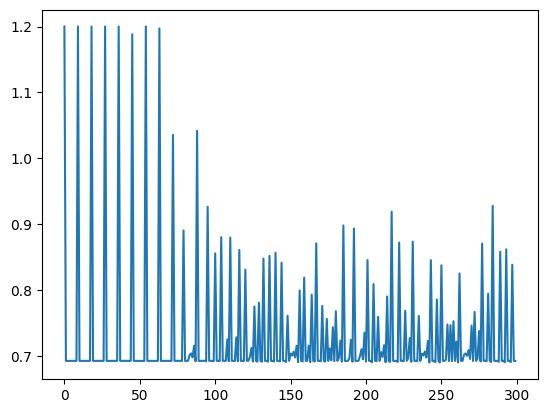

In [104]:
w1 = np.random.rand(X_train1.shape[1],1)  # assuming X is N-by-n. 
                                        # if X is n-by-N, use X_train.shape[0]
y_train1 = y_train1.reshape(-1,1)
y_test1 = y_test1.reshape(-1,1)
print(w1.shape)
print(X_train1.shape)
print(y_train1.shape)
b1 = 0
w1, b1, loss1 = train(w1, b1, X_train1, y_train1, iter=300, lr=0.01)
plt.figure()
plt.plot(loss1)

#training accuracy 
z1 = model(w1,b1,X_train1)
print(accuracy(np.squeeze(y_train1), predict(z1)))

In [105]:
z1 = model(w1,b1,X_test1)
y_test1=np.squeeze(y_test1)
print(accuracy(y_test1, predict(z1)))


In model, X: (12357, 35), b: [-0.37], w: (35, 1)
0.9081492271586955


/tmp/ipykernel_146295/1126415571.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))
